<a href="https://colab.research.google.com/github/youzhanghe123/CIFAR-10-image-classification/blob/main/CIFAR_10_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split


# Set device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize images to [-1, 1]
])

# Download CIFAR-10 dataset
org_train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


train_size = int(0.9 * len(org_train_dataset))
val_size = len(org_train_dataset) - train_size

train_dataset, val_dataset = random_split(org_train_dataset, [train_size, val_size])

# Create DataLoader for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)

# DataLoader
batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)



Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


CNN model

In [ ]:
# Define the CNN model
class CNNNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Create the layers of your CNN here
        # Define the convolutional layers
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)

        # Define the fully connected layers
        self.fc1 = nn.Linear(32 * 64, 128) #here 64 is that we apply a stride 2 max pooling layer on a 32*32 image twice
        # define the final output categories
        self.output=10
        self.fc2 = nn.Linear(128, self.output)

        # Define the activation functions
        self.relu = nn.ReLU()
        self.softmax=nn.Softmax(dim=1)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)


    def forward(self, x):
        # STUDENT TODO START: Perform the forward pass through the layers
        x = self.conv1(x)

        x = self.relu(x)

        x = self.maxpool(x)

        x = self.conv2(x)

        x = self.relu(x)

        x = self.maxpool(x)
        # Flatten the output for the fully connected layers

        x = x.view( -1, 64*32)

        # Forward pass through fully connected layers
        x = self.fc1(x)

        x = self.relu(x)

        x = self.fc2(x)

        output = self.softmax(x)
        return output


model = CNNNet().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 8

trainingloss=[]
trainingacc=[]

for epoch in range(num_epochs):
    epochloss=0
    total_samples=0
    total_correct=0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        epochloss+=loss.item()
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')
    train_accuracy = 100 * total_correct / total_samples
    trainingacc.append(train_accuracy)
    trainingloss.append(epochloss/len(train_loader))


# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Test Accuracy of the model on the 10000 test images: {100 * correct / total}%')


Epoch [1/8], Step [100/704], Loss: 2.1810
Epoch [1/8], Step [200/704], Loss: 2.0846
Epoch [1/8], Step [300/704], Loss: 2.0577
Epoch [1/8], Step [400/704], Loss: 2.1218
Epoch [1/8], Step [500/704], Loss: 2.0245
Epoch [1/8], Step [600/704], Loss: 1.9310
Epoch [1/8], Step [700/704], Loss: 2.0357
Epoch [2/8], Step [100/704], Loss: 2.0505
Epoch [2/8], Step [200/704], Loss: 1.9440
Epoch [2/8], Step [300/704], Loss: 2.0184
Epoch [2/8], Step [400/704], Loss: 1.9018
Epoch [2/8], Step [500/704], Loss: 1.8919
Epoch [2/8], Step [600/704], Loss: 1.9958
Epoch [2/8], Step [700/704], Loss: 1.8673
Epoch [3/8], Step [100/704], Loss: 1.9425
Epoch [3/8], Step [200/704], Loss: 1.8807
Epoch [3/8], Step [300/704], Loss: 1.9777
Epoch [3/8], Step [400/704], Loss: 1.8620
Epoch [3/8], Step [500/704], Loss: 1.9532
Epoch [3/8], Step [600/704], Loss: 1.7881
Epoch [3/8], Step [700/704], Loss: 1.8182
Epoch [4/8], Step [100/704], Loss: 1.8982
Epoch [4/8], Step [200/704], Loss: 1.8955
Epoch [4/8], Step [300/704], Loss:

In [ ]:
print(model)

CNNNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


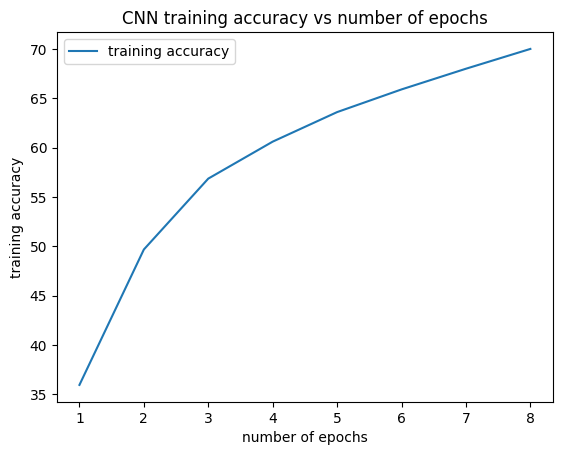

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = [i+1 for i in range(num_epochs)]
y = trainingacc

# Create a line plot
plt.plot(x, y, label='training accuracy')

# Add labels and title
plt.xlabel('number of epochs')
plt.ylabel('training accuracy')
plt.title('CNN training accuracy vs number of epochs')

# Add a legend
plt.legend()

# Show the plot
plt.show()

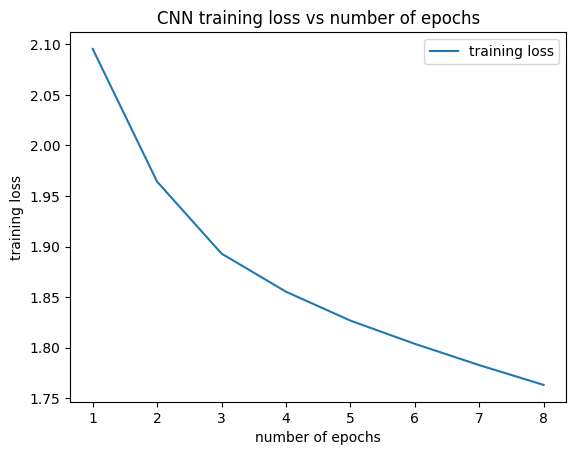

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = [i+1 for i in range(num_epochs)]
y = trainingloss

# Create a line plot
plt.plot(x, y, label='training loss')

# Add labels and title
plt.xlabel('number of epochs')
plt.ylabel('training loss')
plt.title('CNN training loss vs number of epochs')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Transfer learning-Resnet

In [ ]:
from torchvision import models
import torchvision

In [ ]:
import copy

In [ ]:
################################ FINETUNING ##################################

# Load a pretrained model and reset final fully connected layer

# load a pretrained model
transfermodel = models.resnet152(pretrained=True)

# reset final fully connected layer
num_ftrs = transfermodel.fc.in_features

transfermodel.classifier = nn.Sequential(
                        nn.Linear(num_ftrs, 256),
                        nn.ReLU(),
                        nn.Dropout(0.3),
                        nn.Linear(256, 10))

# copy weights for futher retraining on full train dataset
model_wts = copy.deepcopy(transfermodel.state_dict())

# move model to a device
transfermodel = transfermodel.to(device)

# loss
criterion = nn.CrossEntropyLoss()

# all parameters are being optimized
optimizer = optim.SGD(transfermodel.parameters(), lr=0.01)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
transfer_train_loss= []
transfer_train_acc = []

# Note that we have set the number of epochs to be 10. You can choose to increase or decrease the number of epochs.
num_epochs = 6

best_model_wts = copy.deepcopy(transfermodel.state_dict())
best_acc = 0.0
best_iteration=0

for epoch in range(num_epochs):

    transfermodel.train()
    running_loss = 0.
    correct, total = 0, 0

    for i, data in enumerate(train_loader, 0):
        #print(epoch,i)
        inputs, labels = data
        # 1. Store the inputs and labels in the GPU
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 2. Get the model predictions
        predictions = transfermodel.forward(inputs)

        # 3. Zero the gradients out
        optimizer.zero_grad()

        # 4. Get the loss
        loss = criterion(predictions,labels)

        # 5. Calculate the gradients
        loss.backward()

        # 6. Update the weights
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(predictions, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    transfer_train_loss.append(running_loss / len(train_loader))
    transfer_train_acc.append(correct/total)

    #store the best training result
    # find best accuracy on training data
    if (correct/total) > best_acc:

      #print('*New best accuracy*')
      best_acc = (correct/total)
      best_iteration=epoch

      # copy current model weights
      best_model_wts = copy.deepcopy(transfermodel.state_dict())
    ##

    transfermodel.eval()
    running_loss = 0.
    correct, total = 0, 0

    print(f"Epoch {epoch+1}:")

    print(f"Training Loss:", round(transfer_train_loss[epoch], 3))


    print(f"Training Accuracy:", round(transfer_train_acc[epoch], 3))


    print("------------------------------")

Epoch 1:
Training Loss: 1.178
Training Accuracy: 0.647
------------------------------
Epoch 2:
Training Loss: 0.594
Training Accuracy: 0.798
------------------------------
Epoch 3:
Training Loss: 0.392
Training Accuracy: 0.866
------------------------------
Epoch 4:
Training Loss: 0.324
Training Accuracy: 0.888
------------------------------
Epoch 5:
Training Loss: 0.171
Training Accuracy: 0.943
------------------------------
Epoch 6:
Training Loss: 0.111
Training Accuracy: 0.962
------------------------------


In [ ]:
running_loss = 0
correct, total = 0, 0
for i, data in enumerate(test_loader, 0): #i is the index of batch

  inputs, labels = data
  # 1. Store the inputs and labels in the GPU
  #print(i)
  inputs = inputs.to(device)

  labels = labels.to(device)


  # 2. Get the model predictions
  predictions = transfermodel.forward(inputs)
  #print(predictions)

  # 3. Get the loss
  loss = criterion(predictions,labels)

  running_loss += loss.item()

  _, predicted = torch.max(predictions, 1)
  #print("predicted ", predicted,len(predicted))
  total += labels.size(0)
  correct += (predicted == labels).sum().item()

test_loss=running_loss / len(test_loader)
test_acc=(correct/total)

In [ ]:
test_acc

0.7836

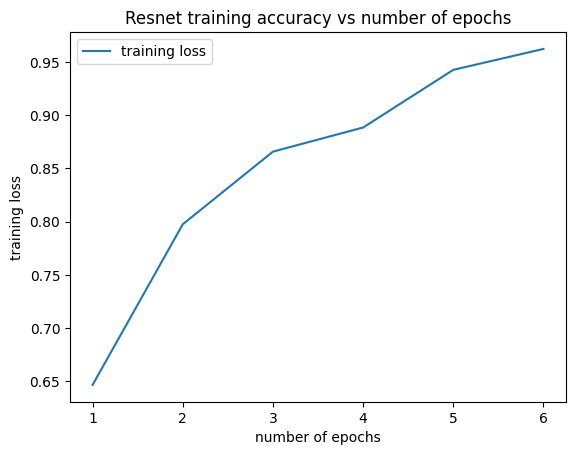

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = [i+1 for i in range(num_epochs)]
y = transfer_train_acc

# Create a line plot
plt.plot(x, y, label='training loss')

# Add labels and title
plt.xlabel('number of epochs')
plt.ylabel('training loss')
plt.title('Resnet training accuracy vs number of epochs')

# Add a legend
plt.legend()

# Show the plot
plt.show()

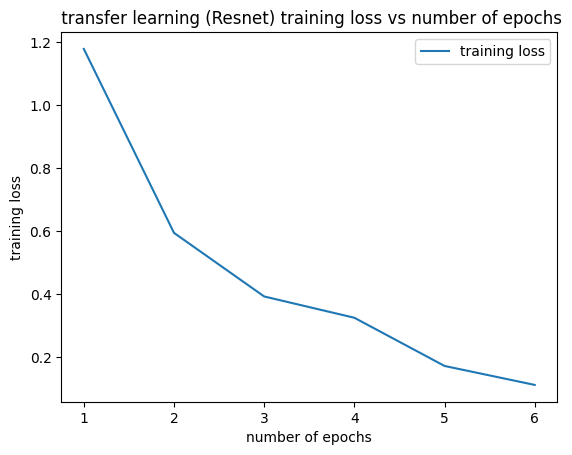

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = [i+1 for i in range(num_epochs)]
y = transfer_train_loss

# Create a line plot
plt.plot(x, y, label='training loss')

# Add labels and title
plt.xlabel('number of epochs')
plt.ylabel('training loss')
plt.title(' transfer learning (Resnet) training loss vs number of epochs')

# Add a legend
plt.legend()

# Show the plot
plt.show()

VGG transfer learning

In [ ]:
from torchvision.models import vgg16

In [ ]:
# Load pre-trained VGG16 model
vgg16model = vgg16(pretrained=True)

vgg16model.classifier[6] = torch.nn.Linear(vgg16model.classifier[6].in_features, 10)

# move model to a device
vgg16model = vgg16model.to(device)

# loss
criterion = nn.CrossEntropyLoss()

# all parameters are being optimized
optimizer = optim.SGD(vgg16model.parameters(), lr=0.01)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
vgg_train_loss= []
vgg_train_acc = []

# Note that we have set the number of epochs to be 10. You can choose to increase or decrease the number of epochs.
num_epochs = 6

best_vggmodel_wts = copy.deepcopy(vgg16model.state_dict())
best_acc = 0.0
best_iteration=0

for epoch in range(num_epochs):

    transfermodel.train()
    running_loss = 0.
    correct, total = 0, 0

    for i, data in enumerate(train_loader, 0):
        #print(epoch,i)
        inputs, labels = data
        # 1. Store the inputs and labels in the GPU
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 2. Get the model predictions
        predictions = vgg16model.forward(inputs)

        # 3. Zero the gradients out
        optimizer.zero_grad()

        # 4. Get the loss
        loss = criterion(predictions,labels)

        # 5. Calculate the gradients
        loss.backward()

        # 6. Update the weights
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(predictions, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    vgg_train_loss.append(running_loss / len(train_loader))
    vgg_train_acc.append(correct/total)

    #store the best training result
    # find best accuracy on training data
    if (correct/total) > best_acc:

      #print('*New best accuracy*')
      best_acc = (correct/total)
      best_iteration=epoch

      # copy current model weights
      best_vggmodel_wts = copy.deepcopy(vgg16model.state_dict())
    ##

    vgg16model.eval()
    running_loss = 0.
    correct, total = 0, 0

    print(f"Epoch {epoch+1}:")

    print(f"Training Loss:", round(vgg_train_loss[epoch], 3))


    print(f"Training Accuracy:", round(vgg_train_acc[epoch], 3))


    print("------------------------------")

Epoch 1:
Training Loss: 0.423
Training Accuracy: 0.854
------------------------------
Epoch 2:
Training Loss: 0.301
Training Accuracy: 0.895
------------------------------
Epoch 3:
Training Loss: 0.212
Training Accuracy: 0.926
------------------------------
Epoch 4:
Training Loss: 0.143
Training Accuracy: 0.951
------------------------------
Epoch 5:
Training Loss: 0.096
Training Accuracy: 0.968
------------------------------
Epoch 6:
Training Loss: 0.066
Training Accuracy: 0.979
------------------------------


In [ ]:
running_loss = 0
correct, total = 0, 0
for i, data in enumerate(test_loader, 0): #i is the index of batch

  inputs, labels = data
  # 1. Store the inputs and labels in the GPU
  #print(i)
  inputs = inputs.to(device)

  labels = labels.to(device)


  # 2. Get the model predictions
  predictions = vgg16model.forward(inputs)
  #print(predictions)

  # 3. Get the loss
  loss = criterion(predictions,labels)

  running_loss += loss.item()

  _, predicted = torch.max(predictions, 1)
  #print("predicted ", predicted,len(predicted))
  total += labels.size(0)
  correct += (predicted == labels).sum().item()

test_loss=running_loss / len(test_loader)
test_acc=(correct/total)

In [ ]:
test_acc

0.8658

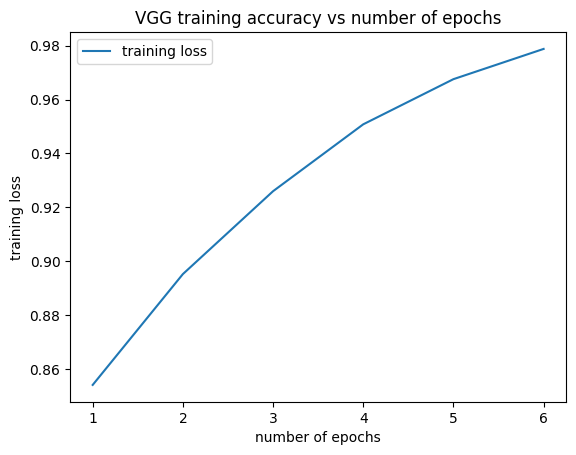

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = [i+1 for i in range(num_epochs)]
y = vgg_train_acc

# Create a line plot
plt.plot(x, y, label='training loss')

# Add labels and title
plt.xlabel('number of epochs')
plt.ylabel('training loss')
plt.title('VGG training accuracy vs number of epochs')

# Add a legend
plt.legend()

# Show the plot
plt.show()

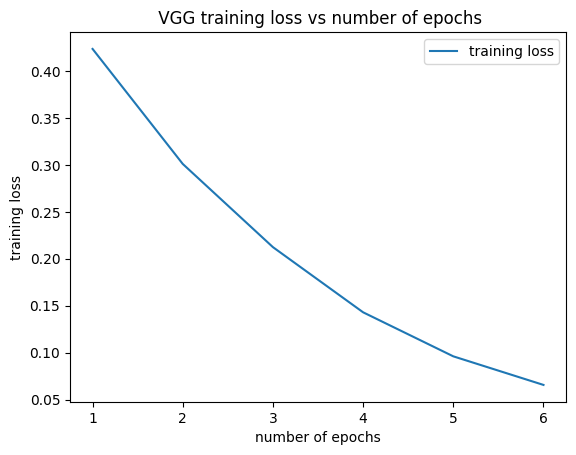

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = [i+1 for i in range(num_epochs)]
y = vgg_train_loss

# Create a line plot
plt.plot(x, y, label='training loss')

# Add labels and title
plt.xlabel('number of epochs')
plt.ylabel('training loss')
plt.title(' VGG training loss vs number of epochs')

# Add a legend
plt.legend()

# Show the plot
plt.show()